In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [68]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [69]:
x[:5], y[:5]

(array([[-0.35955316],
        [ 0.97663904],
        [ 0.40234164],
        [-0.81314628],
        [-0.88778575]]),
 array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
        -30.8791169 ]))

In [70]:
x.shape

(100, 1)

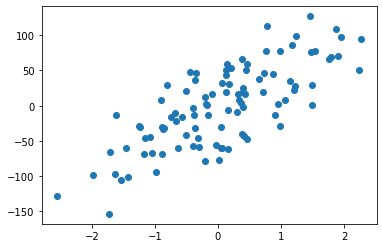

In [71]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [72]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [73]:
np.ones(m)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [75]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

In [76]:
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [77]:
x[:5].transpose()

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.35955316,  0.97663904,  0.40234164, -0.81314628, -0.88778575]])

### Сначала вручную

In [78]:
# шаг алгоритма
alpha = 0.01

In [79]:
np.ones(2), np.ones(2).shape

(array([1., 1.]), (2,))

In [80]:
theta = np.ones(2)

In [81]:
x.ndim, theta.ndim

(2, 1)

In [88]:
np.dot(x, theta)[:5]

array([-18.38192055,  39.34472041,  14.53372421, -37.97820861,
       -41.20280881])

In [94]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    #theta = np.ones(2)
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь - LOSS FUNCTION (ЭТО MSE)
        #print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta, loss

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [95]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

Wall time: 12 ms


In [96]:
theta

(array([-2.84837957, 43.20234847]),
 array([ 13.36409168,  68.14385569,  16.71823115, -66.94497894,
        -10.32366371, -34.62290844,  48.50726653,  -0.59222638,
        -46.85952037,  28.91358467,  17.09294853, -16.47548503,
         35.71206183,  36.39082304, -12.77149746, -38.56488944,
        -11.74384904,   5.03297615, -66.8856174 , -21.64713882,
        -38.12746869,   8.80205405, -69.12358304,  -5.73322199,
        -47.42496072, -82.16496199, -15.74142538,   2.98220196,
        -64.04142246, -14.21131022,  27.12790888, -12.47958352,
         19.43379595, -53.10872534,  74.80283512, -41.52820188,
        -56.07864811, -17.28919184,  59.05424006, -28.86951614,
         34.14144063,  -4.38858142, -11.15958428,  43.67666378,
        -25.49576906,  66.6613123 , -48.88184071,  -7.56590045,
          7.03012944,  58.49405711, -50.47032747,  37.29841156,
         64.05244577,  49.89408449,  11.5288216 , -10.97723136,
         54.20572592,  76.03637318, -15.93334344, -13.05983227,
    

In [19]:
theta = gradient_descent_2(alpha, x, y, 1000)

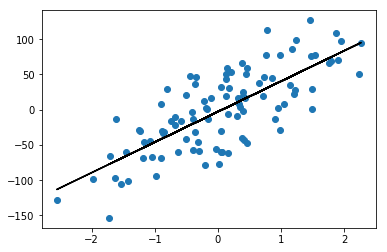

In [20]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

### Используем готовые методы

In [21]:
from sklearn import linear_model

In [22]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [23]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [24]:
%%time 

model.fit( x, y )

CPU times: user 1.83 ms, sys: 2.32 ms, total: 4.15 ms
Wall time: 7.69 ms


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
model.intercept_, model.coef_

(array([-2.80090954]), array([42.73330877]))

In [26]:
y_predict_sgd = model.predict( x )

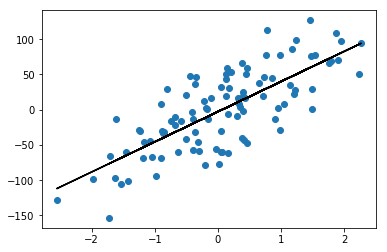

In [27]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()